In [27]:
# Importar as bibliotecas necessárias
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

In [29]:
# Carregar o dataset
dataset = pd.read_csv(r'C:\Users\pedro\Desktop\Pastas\Faculdade\Faculdade-6ano\CIENCIA DE DADOS\dataset\vgsales.csv')

In [31]:
# Visualizar as primeiras linhas do dataset para entender sua estrutura
print("Visualização inicial do dataset:")
print(dataset.head())

Visualização inicial do dataset:
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [32]:
# Como exemplo, vou considerar que as features são as colunas 'Rank', 'Year', 'Global_Sales'
# E o alvo (target) é a coluna 'Genre' - mas isso pode ser ajustado dependendo da sua análise
X = dataset[['Rank', 'Year', 'Global_Sales']]
y = dataset['Genre']

In [33]:
# Codificar variáveis categóricas
one_hot_data = pd.get_dummies(X, drop_first=True)

In [37]:
# Verificar dados nulos e realizar o pré-processamento se necessário
print("\nChecar por dados nulos:")
print(dataset.isnull().sum())


Checar por dados nulos:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [39]:
# Preencher valores nulos, se existirem
X = one_hot_data.fillna(one_hot_data.mean())

In [41]:
# Definir parâmetros para limitar a complexidade da árvore
clf = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,            # Limita a profundidade máxima da árvore
    min_samples_split=10,   # Número mínimo de amostras para dividir um nó
    min_samples_leaf=5,     # Número mínimo de amostras em cada folha
    max_leaf_nodes=20       # Número máximo de folhas na árvore
)

In [43]:
# Ajustar o modelo com os dados
clf = clf.fit(X, y)

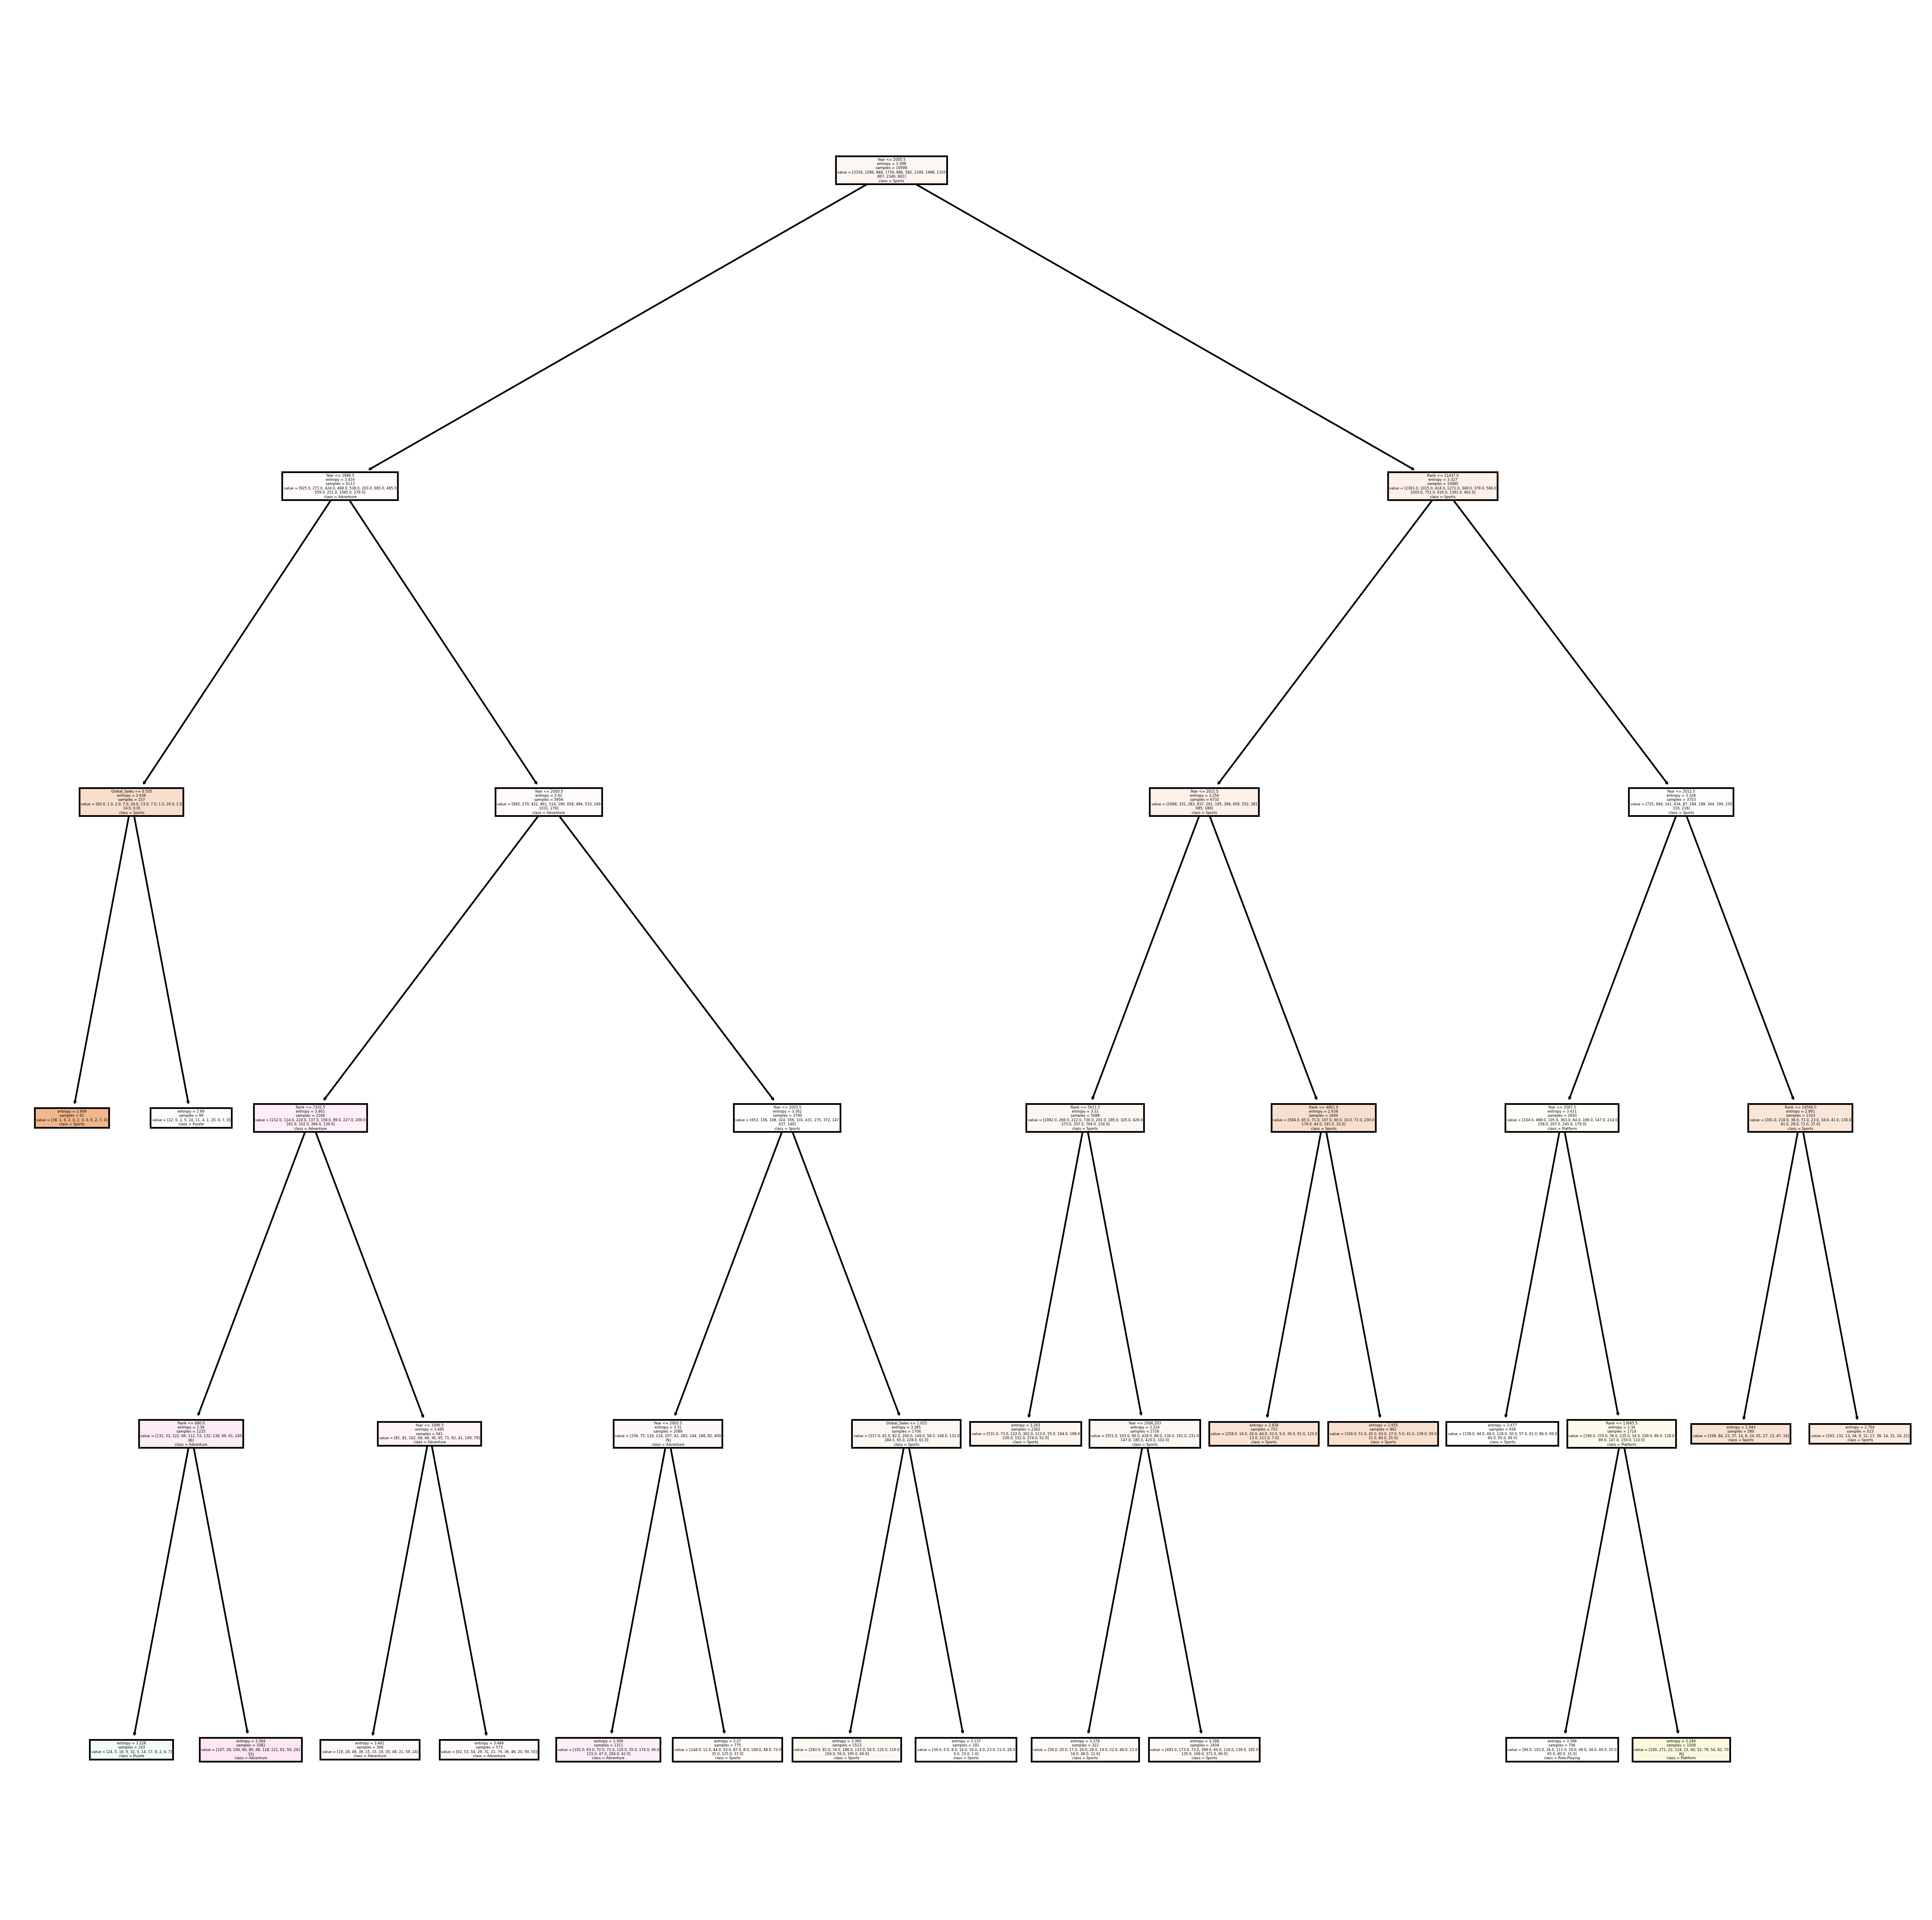

In [45]:
# Visualização da árvore de decisão
fn = one_hot_data.columns.tolist()
cn = y.unique().astype(str).tolist()  # Classes como strings

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=300)  # Tamanho ajustado para melhor visualização
tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True, max_depth=5)  # Limita a profundidade na visualização
fig.savefig('decision_tree.png')

In [46]:
# Exibir a árvore de decisão
plt.show()

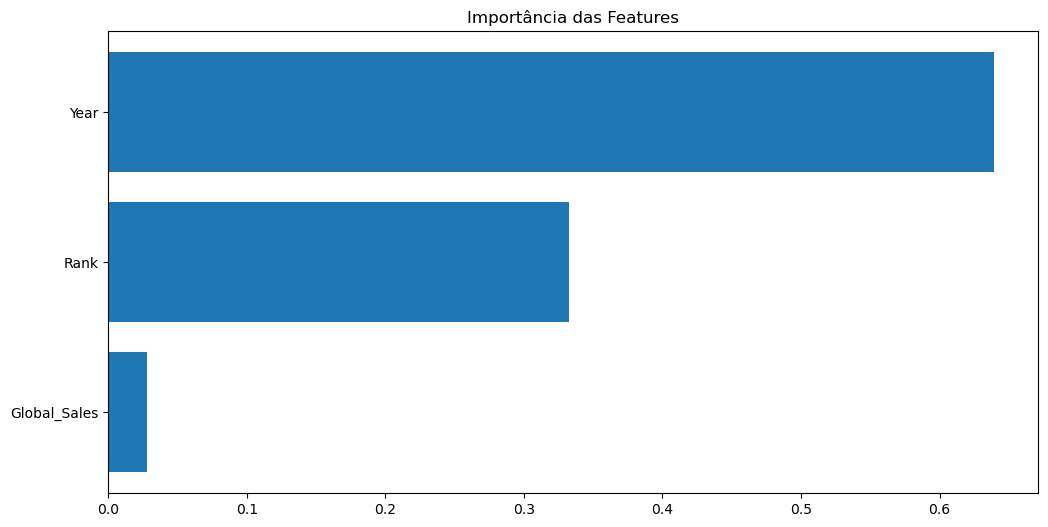

In [47]:
# Análise da importância das features
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(fn)[sorted_idx])
plt.title('Importância das Features')
plt.show()